In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# load the dataset
df = pd.read_csv("books_1.Best_Books_Ever.csv")

# Display the first few rows of the DataFrame
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [26]:
# Check column names and shape
print(df.columns.tolist())
df.shape

['bookId', 'title', 'series', 'author', 'rating', 'description', 'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition', 'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards', 'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg', 'bbeScore', 'bbeVotes', 'price']


(52478, 25)

In [27]:
# Subset relevant columns
cols_to_keep = ['title', 'author', 'rating', 'numRatings', 'likedPercent', 'bbeScore', 'bbeVotes', 'genres', 'language', 'firstPublishDate']
df_subset = df[cols_to_keep].copy()

# Drop rows with missing key values
df_subset = df_subset.dropna(subset=['rating', 'numRatings', 'likedPercent', 'bbeScore', 'bbeVotes', 'genres', 'language', 'firstPublishDate'])

In [31]:
# Summary Stats for Key Features
display(features_clean[['rating', 'numRatings', 'likedPercent', 'bbeScore', 'bbeVotes', 'year']].describe())

,rating,numRatings,likedPercent,bbeScore,bbeVotes,year
count,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000
mean,3.963812,3972.756120,92.456029,28.463282,1.019946,1984.995920
std,0.281228,6294.024526,5.083040,12.926138,0.139845,52.140317
min,2.790000,5.000000,58.000000,0.000000,1.000000,1135.000000
25%,3.790000,436.250000,90.000000,19.000000,1.000000,1981.000000
50%,3.965000,1687.000000,94.000000,30.000000,1.000000,1998.000000
75%,4.160000,4781.750000,96.000000,40.000000,1.000000,2008.000000
max,4.850000,91084.000000,100.000000,47.000000,2.000000,2022.000000


In [32]:
# Extract publication year from date string
df_subset['year'] = df_subset['firstPublishDate'].str.extract(r'(\d{4})').astype(float)

# Parse genres from string to list
df_subset['genres'] = df_subset['genres'].apply(lambda g: eval(g) if isinstance(g, str) and g.startswith('[') else [])

# Get top 10 genres
all_genres = [genre for sublist in df_subset['genres'] for genre in sublist]
top_genres = [g for g, _ in Counter(all_genres).most_common(10)]

In [21]:
# One-hot encode top genres
for genre in top_genres:
    df_subset[f'genre_{genre}'] = df_subset['genres'].apply(lambda x: int(genre in x))

In [22]:
# Keep top 5 languages, group rest as 'Other'
top_languages = df_subset['language'].value_counts().nlargest(5).index
df_subset['language_encoded'] = df_subset['language'].apply(lambda x: x if x in top_languages else 'Other')
language_dummies = pd.get_dummies(df_subset['language_encoded'], prefix='lang')

In [23]:
# Final feature matrix
features = df_subset[['rating', 'numRatings', 'likedPercent', 'bbeScore', 'bbeVotes', 'year'] + [f'genre_{g}' for g in top_genres]]
features = pd.concat([features, language_dummies], axis=1)

# Drop any lingering NaNs
features_clean = features.dropna()

# Normalize features
scaler = StandardScaler()
X_scaled_clean = scaler.fit_transform(features_clean)

In [33]:
# Define range of k values to test
inertia = []
k_range = range(2, 11)

# Run KMeans for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_clean)
    inertia.append(kmeans.inertia_)

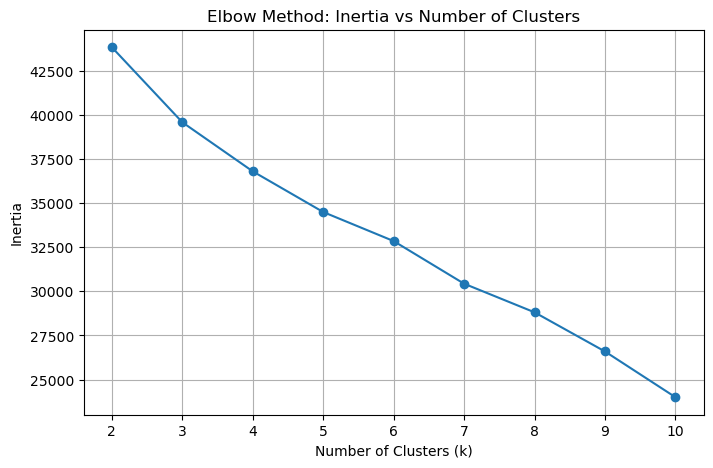

In [34]:
# Plot Elbow Method chart
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method: Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.show()

In [38]:
# Fit KMeans with chosen k = 5
k = 5
kmeans_final = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled_clean)

In [39]:
# Add cluster labels to a copy of the original dataset
df_clustered = df_subset.loc[features_clean.index].copy()
df_clustered['cluster'] = cluster_labels

In [40]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_clean)

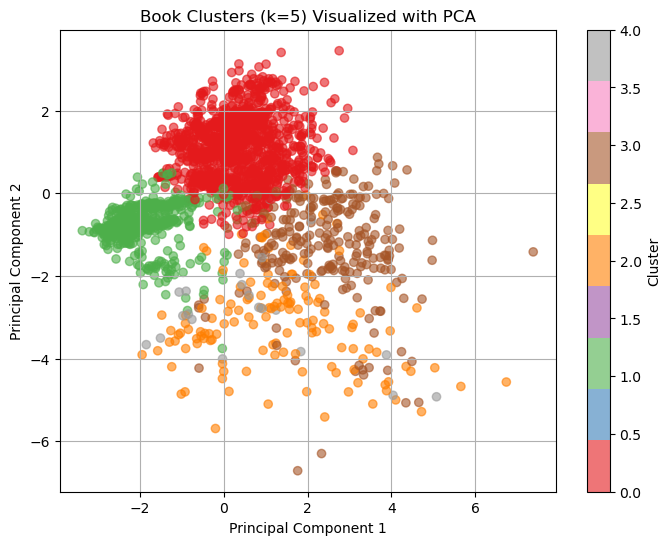

In [41]:
# Plot clusters in 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='Set1', alpha=0.6)
plt.title('Book Clusters (k=5) Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [42]:
# Group by cluster and show basic statistics
cluster_summary = df_clustered.groupby('cluster')[['rating', 'numRatings', 'likedPercent', 'bbeScore', 'year']].mean().round(2)
print("Cluster summary statistics:")
display(cluster_summary)

Cluster summary statistics:


,rating,numRatings,likedPercent,bbeScore,year
cluster,,,,,
0,3.94,5111.85,92.32,29.09,1996.83
1,4.06,2467.48,93.58,27.70,1989.65
2,3.96,1788.46,92.11,28.64,1977.09
3,3.85,3608.63,90.64,27.19,1924.79
4,3.92,2632.00,91.71,29.95,1964.05


In [43]:
# Show example books from each cluster
for i in range(k):
    print(f"\n📚 Example books from Cluster {i}:")
    display(df_clustered[df_clustered['cluster'] == i][['title', 'author', 'rating', 'genres', 'language', 'year']].sample(3, random_state=42+i))


📚 Example books from Cluster 0:


,title,author,rating,genres,language,year
49401,"Happy Cafe, Vol. 1",Kou Matsuzuki,4.22,[],English,2005.0
48924,The Report Card,Andrew Clements,3.87,[],English,2004.0
51632,Double Star,Robert A. Heinlein,3.90,[],English,1956.0



📚 Example books from Cluster 1:


,title,author,rating,genres,language,year
50830,Men to Match My Mountains,Irving Stone,4.11,[],English,1956.0
49731,"1,000 Artist Journal Pages: Personal Pages and...",Dawn DeVries Sokol (Goodreads Author),4.07,[],English,2008.0
50003,"Quantum: Einstein, Bohr and the Great Debate A...",Manjit Kumar,4.22,[],English,2007.0



📚 Example books from Cluster 2:


,title,author,rating,genres,language,year
48847,Il dio del massacro,"Yasmina Reza, Laura Frausin Guarino (Translato...",3.82,[],Italian,2007.0
52403,Edén,Kioskerman,3.97,[],Spanish,2009.0
50751,Τα ποιήματα Α΄ (1961-1978),"Nikos Karouzos, Νίκος Καρούζος",4.41,[],"Greek, Modern (1453-)",1993.0



📚 Example books from Cluster 3:


,title,author,rating,genres,language,year
49378,The Green Ray,Jules Verne,3.40,[],English,1882.0
50094,فساد الأمكنة,صبري موسى,3.90,[],Arabic,1973.0
49900,Heavy Weather,"P.G. Wodehouse, Anthony Lane (Introduction )",4.25,[],English,1933.0



📚 Example books from Cluster 4:


,title,author,rating,genres,language,year
49182,Emilia Galotti,Gotthold Ephraim Lessing,3.09,[],German,1772.0
49299,Ein Mann will nach oben: Die Frauen und der Tr...,Hans Fallada,4.17,[],German,1953.0
49346,Cosmic Trigger: Die letzten Geheimnisse der Il...,Robert Anton Wilson,4.27,[],German,1977.0


/var/folders/sc/h52fjgnn4fs2lk67k15s12m40000gn/T/ipykernel_34926/1333187201.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set1')


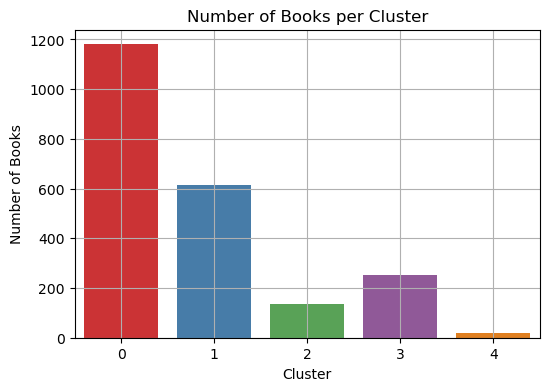

In [44]:
# Bar chart of number of books per cluster
cluster_counts = df_clustered['cluster'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set1')
plt.title("Number of Books per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Books")
plt.grid(True)
plt.show()

In [ ]:
# Show top 10 books per cluster
for cluster_id in sorted(df_clustered['cluster'].unique()):
    print(f"\n📘 Top 10 Books in Cluster {cluster_id} (out of {len(df_clustered[df_clustered['cluster'] == cluster_id])}):")
    top_books = (
        df_clustered[df_clustered['cluster'] == cluster_id]
        .sort_values(by='rating', ascending=False)
        [['title', 'author', 'rating', 'genres', 'language', 'year']]
        .head(10)
        .reset_index(drop=True)
    )
    display(top_books)


📘 Top 10 Books in Cluster 0 (out of 1180):


,title,author,rating,genres,language,year
0,Let Me Hold You Longer,"Karen Kingsbury (Goodreads Author), Mary Colli...",4.67,[],English,2004.0
1,Christina Katerina & the Box,"Patricia Lee Gauch, Doris Burn (Illustrator)",4.59,[],English,1971.0
2,A Time to Dance / A Time to Embrace,Karen Kingsbury (Goodreads Author),4.58,[],English,2001.0
3,Disney's Storybook Collection,"Nancy Parent, Walt Disney Company",4.57,[],English,1998.0
4,The New Prophecy Box Set,Erin Hunter,4.56,[],English,2007.0
5,A Clan of Novaks,Bella Forrest (Goodreads Author),4.53,[],English,2016.0
6,Gabriel's Inferno Trilogy,Sylvain Reynard (Goodreads Author),4.53,[],English,2014.0
7,Tim Burton's The Nightmare Before Christmas,Tim Burton,4.53,[],English,1993.0
8,The PreHistory of The Far Side: A 10th Anniver...,Gary Larson,4.53,[],English,1989.0
9,The Red Tree,Shaun Tan,4.52,[],English,2001.0



📘 Top 10 Books in Cluster 1 (out of 614):


,title,author,rating,genres,language,year
0,An A - Z of Looney Limericks (for big kids),"Bernie Morris (Goodreads Author), Linda Kopers...",4.85,[],English,2009.0
1,Ausl�nder,D.M. Samson (Goodreads Author),4.83,[],English,2013.0
2,Krazy Kat: A Celebration of Sundays,"George Herriman, Patrick McDonnell (Goodreads ...",4.77,[],English,2010.0
3,Overcoming Assumptions That Inhibit Spiritual ...,Idries Shah,4.73,[],English,2000.0
4,Weird & Wonderful Wildlife,"Michael Marten, John May, Rosemary Taylor",4.71,[],English,1982.0
5,A Perfumed Scorpion,Idries Shah,4.70,[],English,1981.0
6,"A Veiled Gazelle: ""Seeing How to See""",Idries Shah,4.69,[],English,1977.0
7,The Woman in the Woods: Linked Stories,Ann Joslin Williams (Goodreads Author),4.68,[],English,2006.0
8,Sufi Thought and Action,Idries Shah,4.68,[],English,1990.0
9,Naked,Mike Leigh,4.65,[],English,1994.0



📘 Top 10 Books in Cluster 2 (out of 137):


,title,author,rating,genres,language,year
0,Obra poética de Fernando Pessoa,Fernando Pessoa,4.73,[],Portuguese,1960.0
1,Բանաստեղծություններ,"Komitas, Լևոն Միրիջանյան (Contributor)",4.67,[],Armenian,1969.0
2,"Black Butler, Vol. 3",Yana Toboso,4.52,[],Indonesian,2007.0
3,"Black Butler, Vol. 9",Yana Toboso,4.52,[],Indonesian,2010.0
4,"Black Butler, Vol. 12",Yana Toboso,4.51,[],Indonesian,2011.0
5,"Black Butler, Vol. 11",Yana Toboso,4.50,[],Indonesian,2011.0
6,"Poesía (Obras, #1)",Oliverio Girondo,4.50,[],Spanish,1994.0
7,"Blue Exorcist, Tome 2",Kazue Kato,4.48,[],French,2009.0
8,Lykke-Per,Henrik Pontoppidan,4.46,[],Danish,1898.0
9,"...καλά, εσύ σκοτώθηκες νωρίς","Χρόνης Μίσσιος, Chronis Missios",4.46,[],"Greek, Modern (1453-)",1985.0



📘 Top 10 Books in Cluster 3 (out of 254):


,title,author,rating,genres,language,year
0,Jane Austen: The Complete Collection,Jane Austen,4.63,[],English,1989.0
1,Ahead of All Parting: The Selected Poetry and ...,"Rainer Maria Rilke, Stephen Mitchell (Goodread...",4.62,[],English,1995.0
2,Sherlock Holmes: The Complete Novels and Stori...,"Arthur Conan Doyle, Loren D. Estleman (Introdu...",4.48,[],English,1986.0
3,The Far Side of the World,Patrick O'Brian,4.45,[],English,1984.0
4,The Annotated Brothers Grimm,"Jacob Grimm, Wilhelm Grimm, Maria Tatar (Edito...",4.45,[],English,2004.0
5,Duino Elegies,"Rainer Maria Rilke, David Young (Translator)",4.43,[],English,1922.0
6,The Nutmeg of Consolation,Patrick O'Brian,4.41,[],English,1991.0
7,The Surgeon's Mate,Patrick O'Brian,4.40,[],English,1980.0
8,The Fortune of War,Patrick O'Brian,4.40,[],English,1979.0
9,Mahabharata: A Modern Retelling,"Carole Satyamurti, Wendy Doniger (Goodreads Au...",4.39,[],English,2015.0



📘 Top 10 Books in Cluster 4 (out of 21):


,title,author,rating,genres,language,year
0,Die Letzten Eiskrieger,Bernhard Hennen,4.41,[],German,2013.0
1,Schattenjagd,Maya Shepherd (Goodreads Author),4.30,[],German,2014.0
2,Cosmic Trigger: Die letzten Geheimnisse der Il...,Robert Anton Wilson,4.27,[],German,1977.0
3,Die Windgängerin,Bernhard Hennen,4.27,[],German,2012.0
4,konkrete poesie,Eugen Gomringer (Editor),4.26,[],German,1996.0
5,Ein Mann will nach oben: Die Frauen und der Tr...,Hans Fallada,4.17,[],German,1953.0
6,Dunkler Wahn,Wulf Dorn,4.16,[],German,2011.0
7,Der Herr der Ringe. Anhänge und Register,J.R.R. Tolkien,4.15,[],German,1955.0
8,Fraktale und Finanzen,"Richard Hudson, Richard L. Hudson",4.07,[],German,1997.0
9,Böse Absichten,Keigo Higashino,3.97,[],German,1996.0
